## Kaggle Santander 실습



### 내용
1. 사용자(ncopders)기준으로 전체 데이터 중 1/1000 추출
2. 탐색적 데이터 분석
    
    [1] 변수 & 라벨
        - 데이터형 확인
        - unique 데이터 확인
        - 결측값 확인
        - 최대, 최소, 평균 값 확인
        - 막대그래프 시각화
    [2] 변수 vs 라벨
        - Scatterplot

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import time

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
st = time.time()
print '='*50
print '# Begin Data Extraction from Kaggle Santander Full Dataset'
print '-'*50

# ncodper list
ncodper_list = ['1375586','1050611','1050612','1050613','1050614','1050615','1050616','1050617','1050619','1050620']

#f_path = '../input/train_ver2.csv'
f_path = '../Data/Raw/train_ver2.csv'
g_path = '../Data/Raw/fastdata_sample.csv'

f = open(f_path,'r')
g = open(g_path,'w')
col_names = f.readline()[:-1]
g.write(col_names + '\n')
f_count = 0
g_count = 0

while 1:
    # read single line, drop '\n'
    line = f.readline()[:-1]
    f_count += 1
    
    # break if end of the file
    if line == '':
        break

    # process input into variables
    tmp1 = line.split('"')
    arr = tmp1[0][:-1].split(',') + [tmp1[1]] + tmp1[2][1:].split(',')
    arr = [a.strip() for a in arr]        
    (fecha_dato, ncodpers, ind_empleado, pais_residencia, \
    sexo, age, fecha_alta, ind_nuevo, antiguedad, indrel, \
    ult_fec_cli_1t, indrel_1mes, tiprel_1mes, indresi, \
    indext, conyuemp, canal_entrada, indfall, tipodom, \
    cod_prov, nomprov, ind_actividad_cliente, renta, segmento) = arr[:24]

    # check ncodper in our list
    if ncodpers in ncodper_list:
        out = line + '\n'
        g.write(out)
        g_count += 1
    
    if f_count % 1000 == 0:
        print '  processing {} lines..'.format(f_count)
f.close()
g.close()
en = time.time()

print '-'*50
print '# Total of {} lines scanned.'.format(f_count)
print '# Total of {} ncodpers fetched.'.format(len(ncodper_list))
print '# Total of {} lines retrieved and saved at {}'.format(g_count, g_path)
print '# Total of {} seconds elapsed.'.format(int(en-st)) # 10 ncodpers list took 161 secs
print '='*50

In [4]:
print '# Import Data '
df = pd.read_csv(g_path)

data = df.iloc[:,:24]
labels = df.iloc[:,24:]
data.head()

# Import Data 


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1,...,N,NaN,KHL,N,1,29,MALAGA,1,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1,...,S,NaN,KHE,N,1,13,CIUDAD REAL,0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1,...,N,NaN,KHE,N,1,13,CIUDAD REAL,0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1,...,N,NaN,KHD,N,1,50,ZARAGOZA,0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1,...,N,NaN,KHE,N,1,50,ZARAGOZA,1,NaN,03 - UNIVERSITARIO


In [5]:
print '# Check Feature type '
print data.info()

# Check Feature type 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 24 columns):
fecha_dato               167 non-null object
ncodpers                 167 non-null int64
ind_empleado             167 non-null object
pais_residencia          167 non-null object
sexo                     167 non-null object
age                      167 non-null int64
fecha_alta               167 non-null object
ind_nuevo                167 non-null int64
antiguedad               167 non-null int64
indrel                   167 non-null int64
ult_fec_cli_1t           0 non-null float64
indrel_1mes              167 non-null float64
tiprel_1mes              167 non-null object
indresi                  167 non-null object
indext                   167 non-null object
conyuemp                 0 non-null float64
canal_entrada            167 non-null object
indfall                  167 non-null object
tipodom                  167 non-null int64
cod_prov                 

In [6]:
numerical_cols = ['age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes', 'tipodom', \
                  'cod_prov', 'ind_actividad_cliente', 'renta']

In [7]:
print '# Check Unique values for each feature '
for col in data.columns:
    print col, data[col].unique()

# Check Unique values for each feature 
fecha_dato ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
ncodpers [1375586 1050611 1050612 1050613 1050614 1050615 1050616 1050617 1050619
 1050620]
ind_empleado ['N']
pais_residencia ['ES']
sexo ['H' 'V']
age [35 23 22 24 36 25]
fecha_alta ['2015-01-12' '2012-08-10']
ind_nuevo [0]
antiguedad [ 6 35  7 36 37  8 38  9 10 39 40 11 12 41 13 42 14 43 44 15 16 45]
indrel [1]
ult_fec_cli_1t [ nan]
indrel_1mes [ 1.]
tiprel_1mes ['A' 'I']
indresi ['S']
indext ['N' 'S']
conyuemp [ nan]
canal_entrada ['KHL' 'KHE' 'KHD']
indfall ['N']
tipodom [1]
cod_prov [29 13 50 45 24 20 10]
nomprov ['MALAGA' 'CIUDAD REAL' 'ZARAGOZA' 'TOLEDO' 'LEON' 'GIPUZKOA' 'CACERES']
ind_actividad_cliente [1 0]
renta [  87218.1    35548.74  122179.11  119775.54        nan   22220.04
  295590.36  113316.66  

In [8]:
print '# Check NAs for each feature '
for col in data.columns:
    print col, data[col].isnull().sum()

# Check NAs for each feature 
fecha_dato 0
ncodpers 0
ind_empleado 0
pais_residencia 0
sexo 0
age 0
fecha_alta 0
ind_nuevo 0
antiguedad 0
indrel 0
ult_fec_cli_1t 167
indrel_1mes 0
tiprel_1mes 0
indresi 0
indext 0
conyuemp 167
canal_entrada 0
indfall 0
tipodom 0
cod_prov 0
nomprov 0
ind_actividad_cliente 0
renta 34
segmento 0


In [9]:
print '# Check Statistics for each numerical feature '

data.describe()

# Check Statistics for each numerical feature 


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,age,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,conyuemp,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.670000e+02,167.000000,167.0,167.000000,167.0,0.0,167.0,0.0,167.0,167.000000,167.000000,133.000000
mean,1.083696e+06,24.491018,0.0,35.341317,1.0,NaN,1.0,NaN,1.0,30.047904,0.257485,113491.830000
std,9.856031e+04,3.786260,0.0,9.486053,0.0,NaN,0.0,NaN,0.0,15.902492,0.438564,78922.056082
min,1.050611e+06,22.000000,0.0,6.000000,1.0,NaN,1.0,NaN,1.0,10.000000,0.000000,22220.040000
25%,1.050613e+06,23.000000,0.0,35.000000,1.0,NaN,1.0,NaN,1.0,13.000000,0.000000,NaN
50%,1.050616e+06,23.000000,0.0,36.000000,1.0,NaN,1.0,NaN,1.0,24.000000,0.000000,NaN
75%,1.050619e+06,24.000000,0.0,41.000000,1.0,NaN,1.0,NaN,1.0,50.000000,1.000000,NaN
max,1.375586e+06,36.000000,0.0,45.000000,1.0,NaN,1.0,NaN,1.0,50.000000,1.000000,295590.360000


# Check Histogram for each numerical feature 


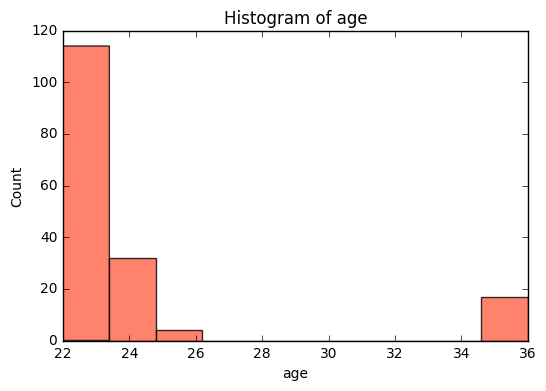

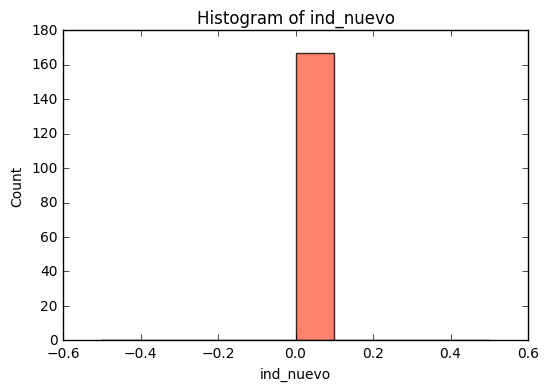

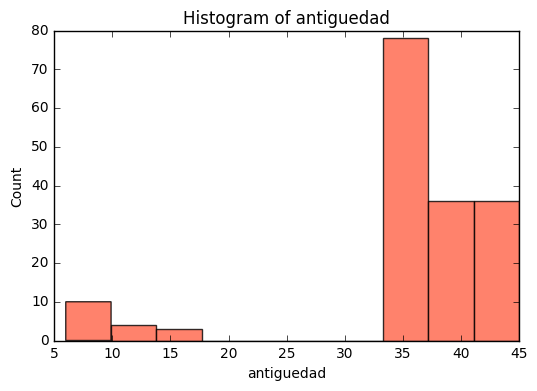

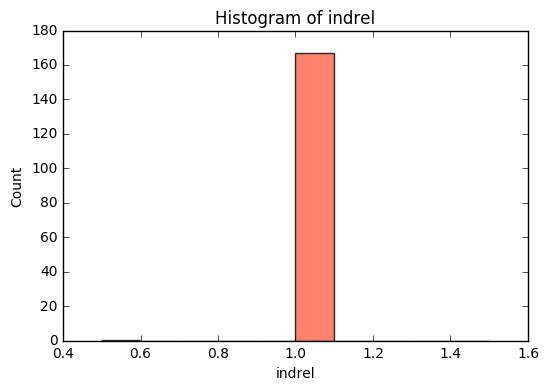

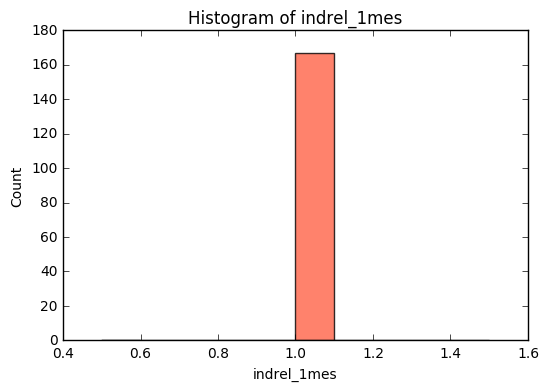

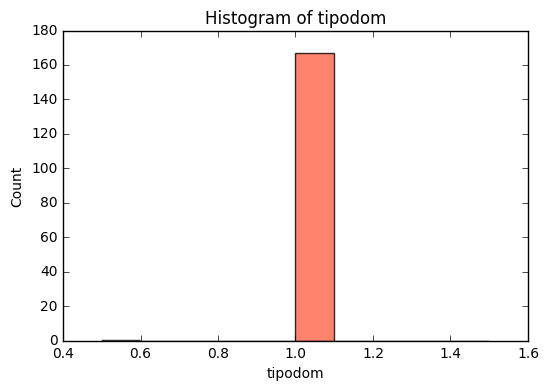

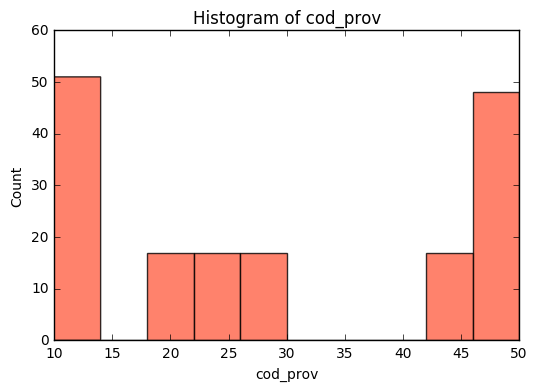

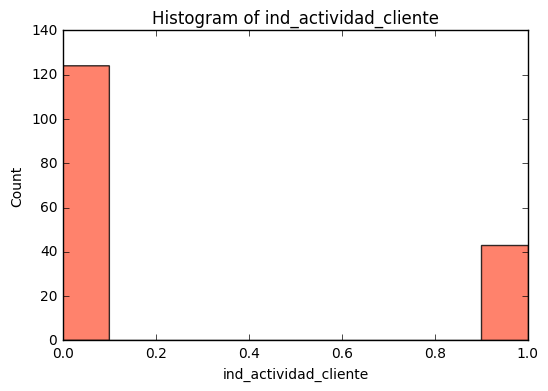

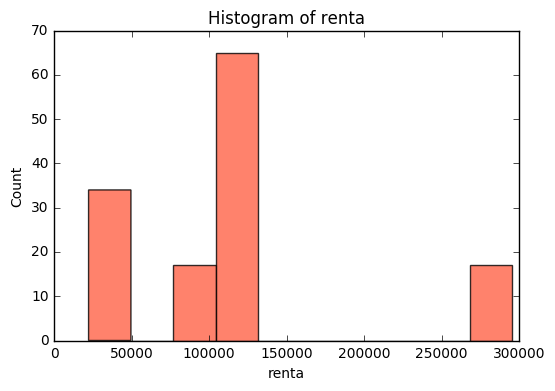

In [10]:
print '# Check Histogram for each numerical feature '

for col in numerical_cols:
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title('Histogram of {}'.format(col))

    x = data[col].dropna(axis=0)
    ax.hist(x,color='tomato',alpha=0.8)
    plt.show()

# Check Histogram for each categorical feature 


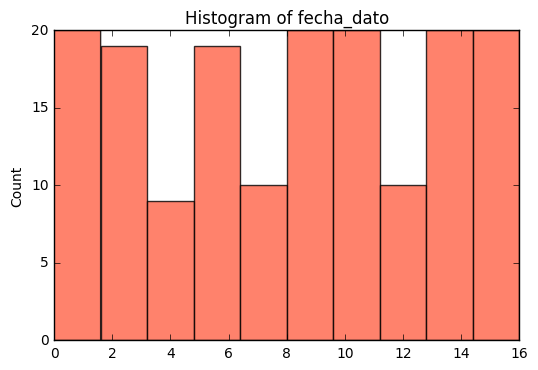

['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']


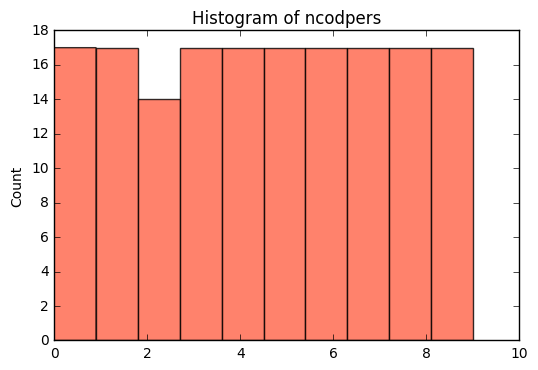

[1050611, 1050612, 1050613, 1050614, 1050615, 1050616, 1050617, 1050619, 1050620, 1375586]


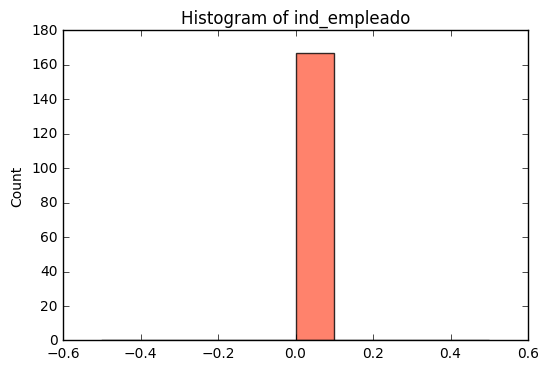

['N']


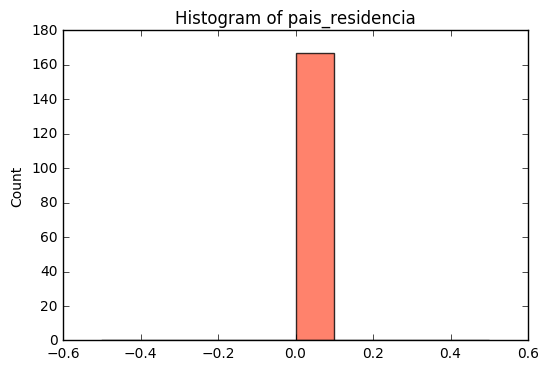

['ES']


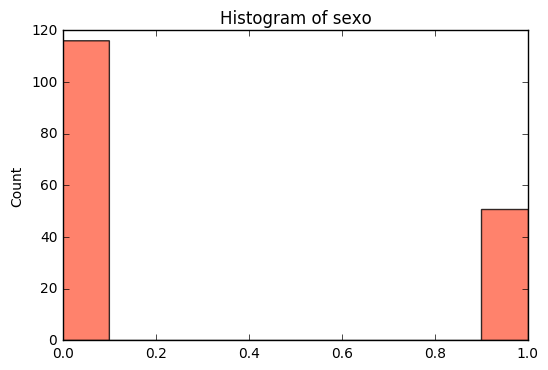

['H', 'V']


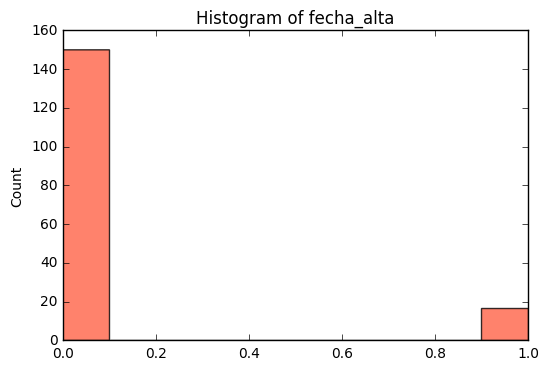

['2012-08-10', '2015-01-12']


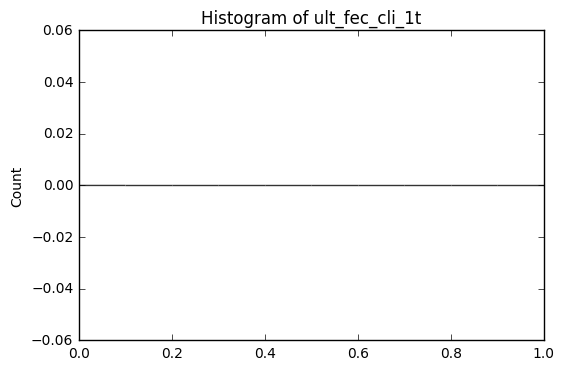

[]


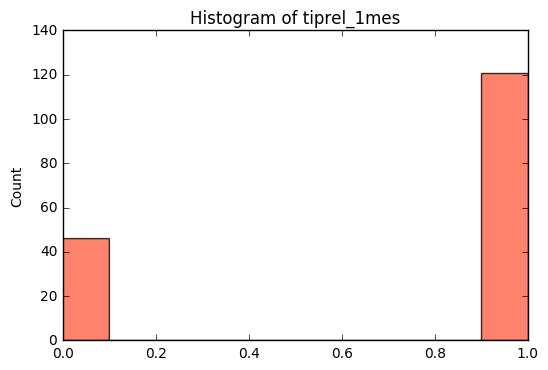

['A', 'I']


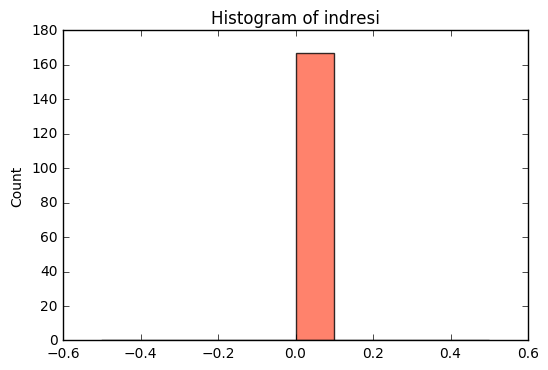

['S']


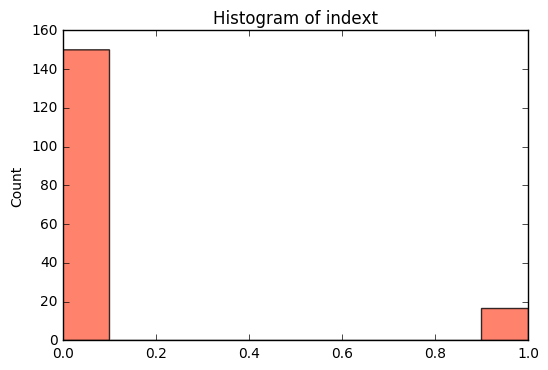

['N', 'S']


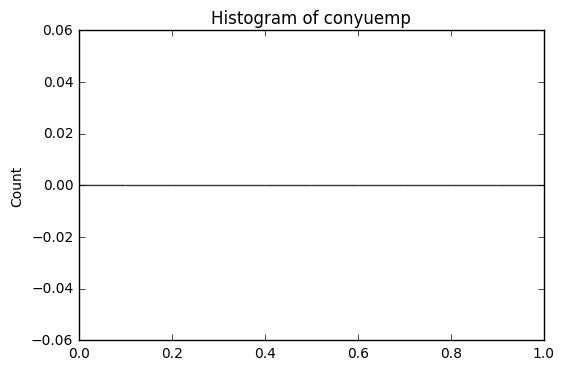

[]


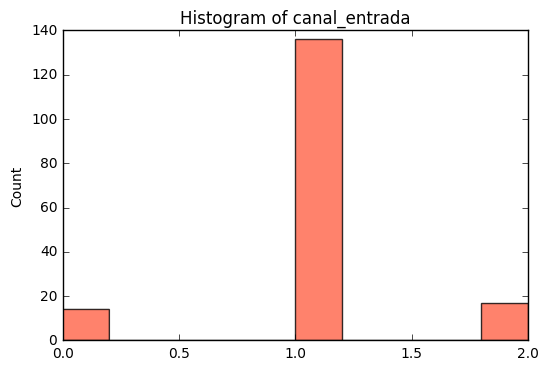

['KHD', 'KHE', 'KHL']


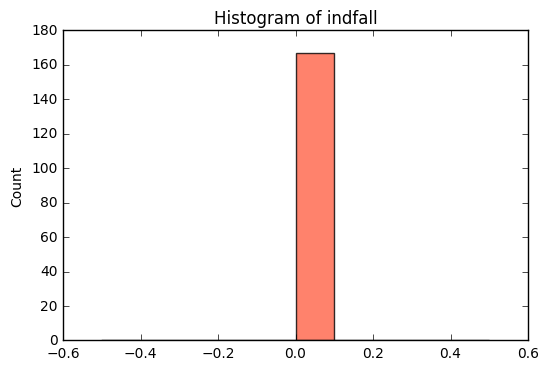

['N']


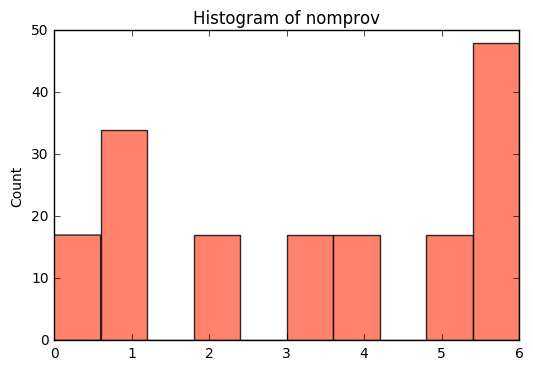

['CACERES', 'CIUDAD REAL', 'GIPUZKOA', 'LEON', 'MALAGA', 'TOLEDO', 'ZARAGOZA']


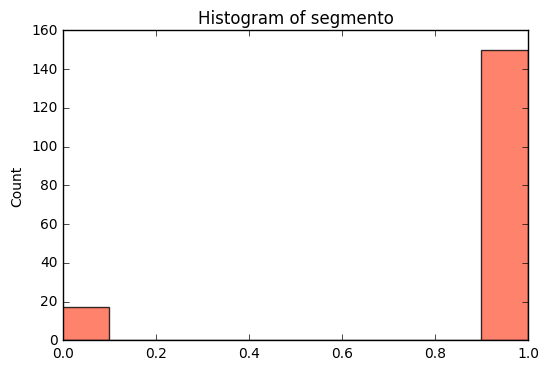

['02 - PARTICULARES', '03 - UNIVERSITARIO']


In [11]:
print '# Check Histogram for each categorical feature '

categorical_cols = [col for col in data.columns if col not in numerical_cols]

for col in categorical_cols:
    lb = LabelEncoder()
    x = lb.fit_transform(data[col].dropna(axis=0))
    plt.hist(x,color='tomato',alpha=0.8)

    plt.ylabel('Count')
    plt.title('Histogram of {}'.format(col))

    plt.show()

    print lb.classes_.tolist()    

# Check histogram for target values


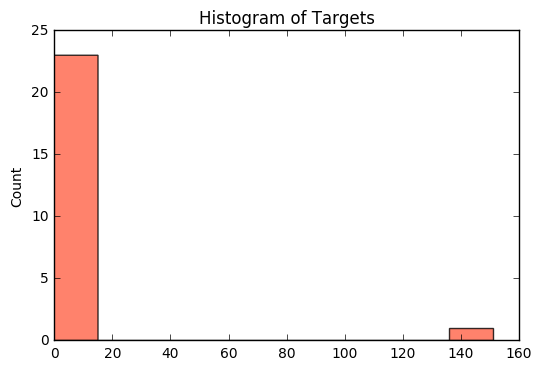

ind_ahor_fin_ult1      0
ind_aval_fin_ult1      0
ind_cco_fin_ult1     151
ind_cder_fin_ult1      0
ind_cno_fin_ult1       0
ind_ctju_fin_ult1      0
ind_ctma_fin_ult1      0
ind_ctop_fin_ult1      0
ind_ctpp_fin_ult1      0
ind_deco_fin_ult1      2
ind_deme_fin_ult1      0
ind_dela_fin_ult1      0
ind_ecue_fin_ult1      0
ind_fond_fin_ult1      0
ind_hip_fin_ult1       0
ind_plan_fin_ult1      0
ind_pres_fin_ult1      0
ind_reca_fin_ult1      2
ind_tjcr_fin_ult1      0
ind_valo_fin_ult1      0
ind_viv_fin_ult1       0
ind_nomina_ult1        0
ind_nom_pens_ult1      0
ind_recibo_ult1        4
dtype: int64


In [12]:
print '# Check histogram for target values'

x = labels.sum(axis=0).values
plt.hist(x,color='tomato',alpha=0.8)
plt.ylabel('Count')
plt.title('Histogram of {}'.format('Targets'))
plt.show()

print labels.sum(axis=0)

# Scatterplot with feature vs variable
# age vs ind_cco_fin_ult1


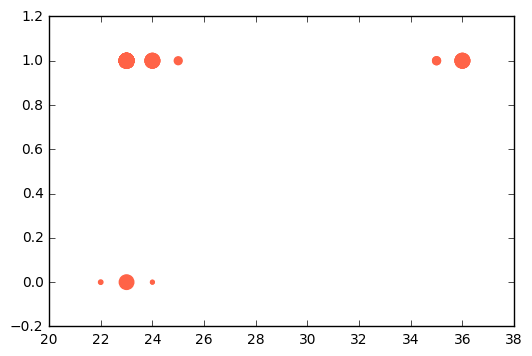

# ind_nuevo vs ind_cco_fin_ult1


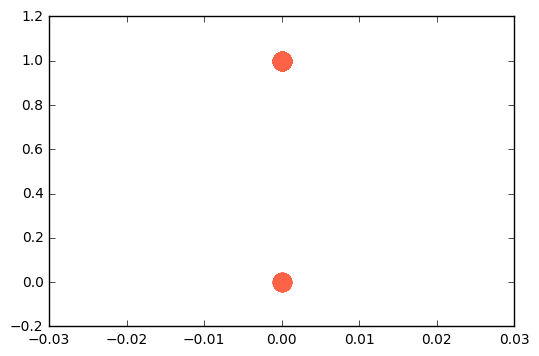

# antiguedad vs ind_cco_fin_ult1


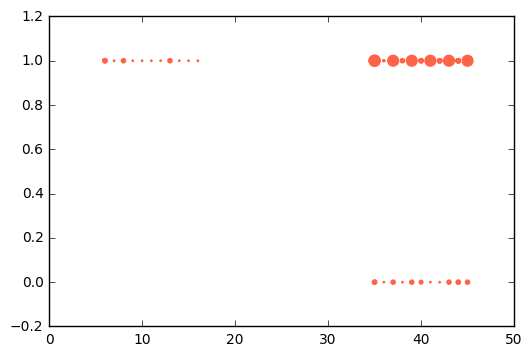

# indrel vs ind_cco_fin_ult1


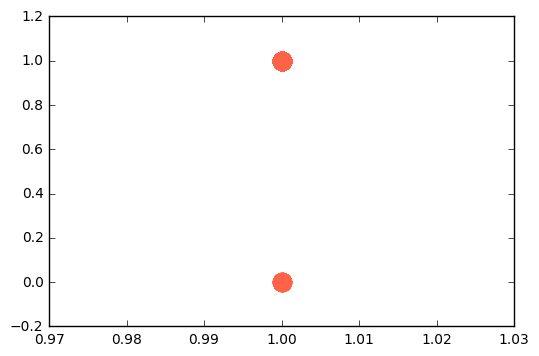

# indrel_1mes vs ind_cco_fin_ult1


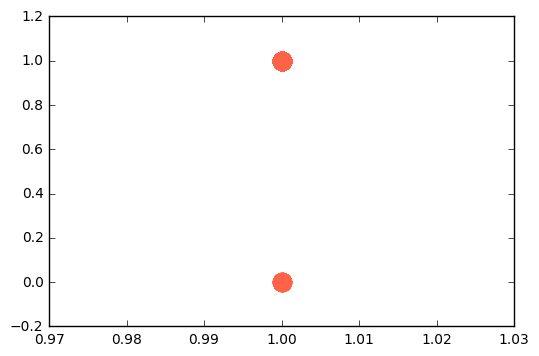

# tipodom vs ind_cco_fin_ult1


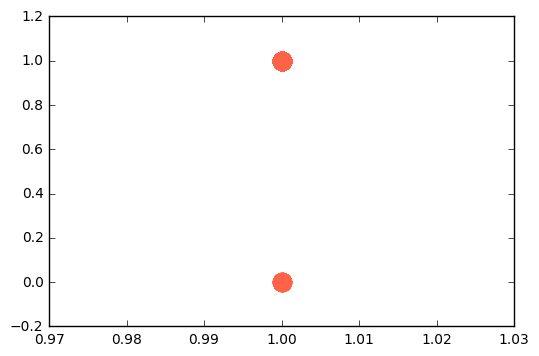

# cod_prov vs ind_cco_fin_ult1


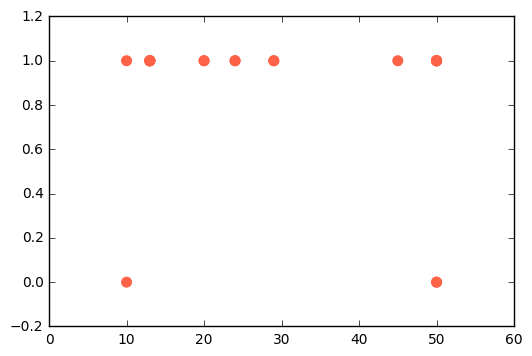

# ind_actividad_cliente vs ind_cco_fin_ult1


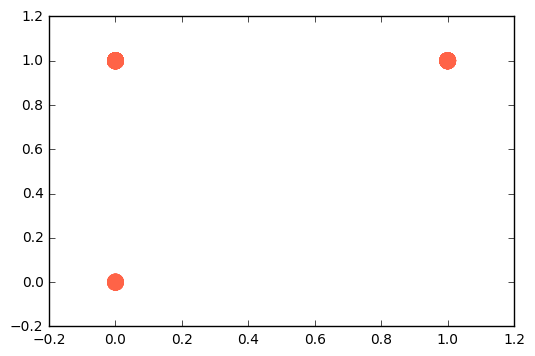

# renta vs ind_cco_fin_ult1


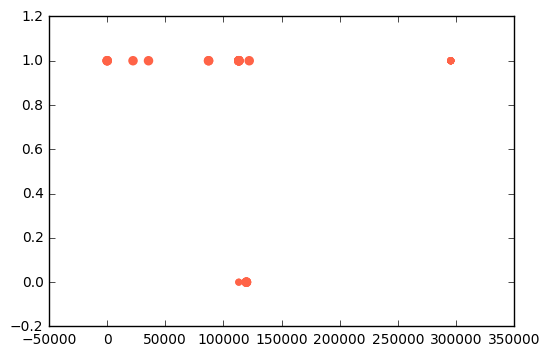

In [13]:
print '# Scatterplot with feature vs variable'

target = 'ind_cco_fin_ult1'
for col in numerical_cols:
    print '# {} vs {}'.format(col, target)
    x = data[col].fillna(-1).values
    y = labels[target].values
    s = [0]*np.unique(x).shape[0]
    for item in x:
        s[np.unique(x).tolist().index(item)] += 1

    plt.scatter(x, y, s=s, color='tomato')
    plt.show()